
# Iris flowers classificaions
## LGMVIP-DATASCIENCE OCTOBER INTERNSHIP BEGINNER LEVEL TASK 1
### By Anjali kumari



In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn




In [98]:
df=pd.read_csv("Iris.csv.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [76]:
#delete a column
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [77]:
#to display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [78]:
#to display basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [79]:
#check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

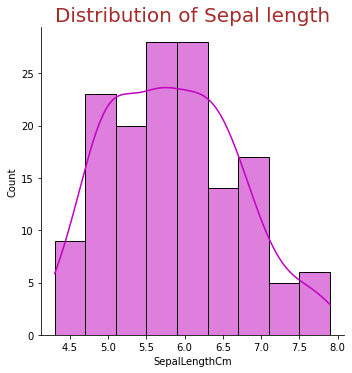

In [80]:
sns.displot(df['SepalLengthCm'],kde=True, color="m")
plt.title("Distribution of Sepal length", fontsize=20, color="Brown")
plt.show()

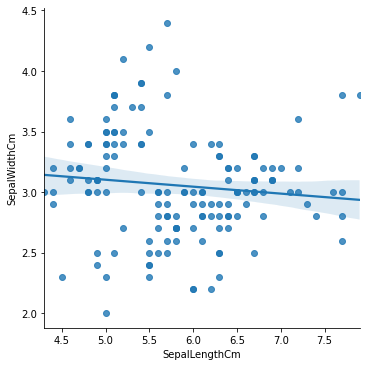

In [81]:
sns.lmplot(x='SepalLengthCm',y='SepalWidthCm', data=df)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='count'>

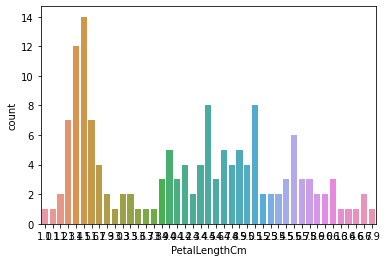

In [82]:
sns.countplot(x='PetalLengthCm',data=df)


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

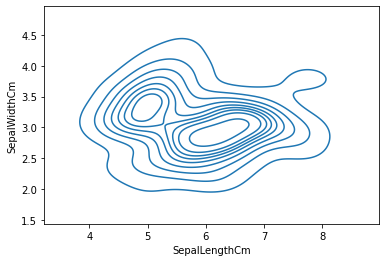

In [83]:
sns.kdeplot(x='SepalLengthCm',y="SepalWidthCm",data=df)

# Corelation Matrix
corelation matrix is a table showing coorelation coefficients between variables.

In [84]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

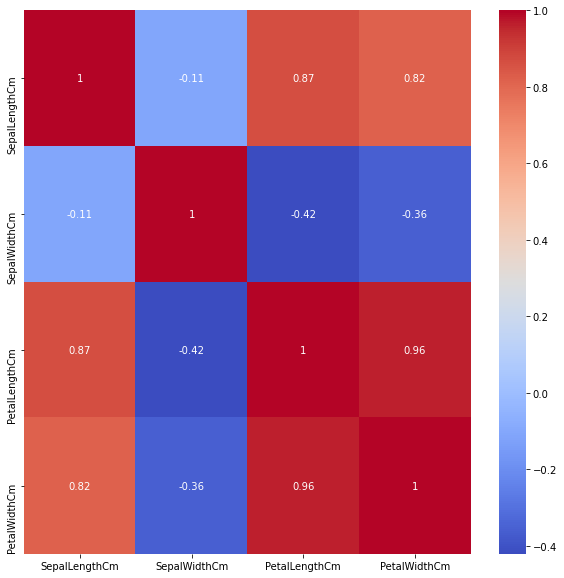

In [85]:
corr=df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

# Label Encoder
In machine learning we usually deals with datasets which contains multiple labels in one or more than one columns.These labels can be in the form of words or columns.Label encoding refers to converting the labels into numeric form so as to convert it into the machine readable format

In [86]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [87]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [88]:
from sklearn.model_selection import train_test_split
#train-70
#test-30
X= df.drop(columns=['Species'])
Y=df['Species']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)

In [89]:
#lOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [90]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
#print metric to get performance
print("Accuracy:" ,model.score(x_test, y_test)*100)

Accuracy: 100.0


In [92]:
#knn=k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [93]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [94]:
print("Accuracy:", model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [95]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [96]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [97]:
#print metric to get performance
print("Accuracy:", model.score(x_test,y_test)*100)

Accuracy: 100.0
